<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/BarChart_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bar Charts Pattern Language
## Data Set: Pokemon

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'
pokemon = pd.read_csv(path + 'pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Bar Chart using Seaborn
A basic bar chart of frequencies can be created through the use of seaborn's `countplot` function.

```
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```

### Create a vertical bar chart with default colors


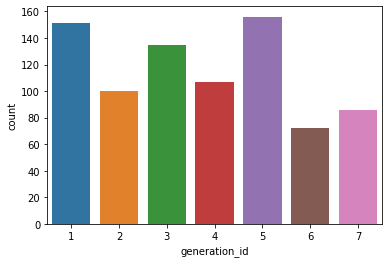

In [2]:
sns.countplot(data=pokemon, x='generation_id');

### Create a vertical bar chart with a uniform single color

The `color_palette()` returns the the current / default palette as a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 

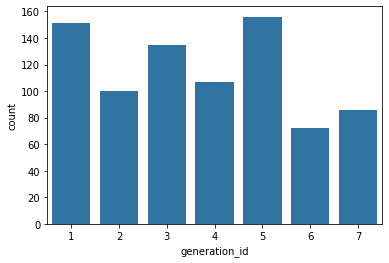

In [3]:
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

# Use the `color` argument
sns.countplot(data=pokemon, x='generation_id', color=base_color);

### Create a vertical bar chart with ordered bars

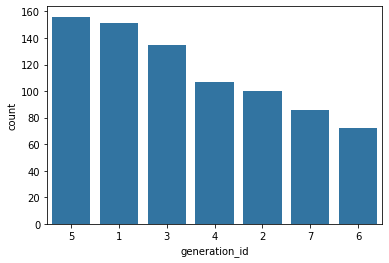

In [4]:
# Static-ordering the bars
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

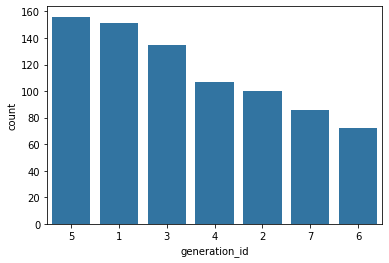

In [5]:
# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

### Rotate the category labels (not axes)

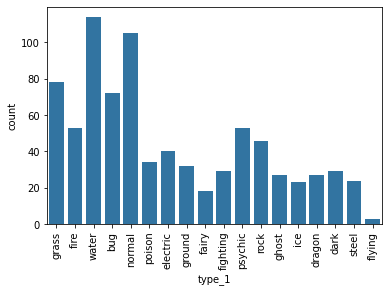

In [6]:
# Plot the Pokemon type on a Vertical bar chart
sns.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

### Rotate the axes clocwise = Create a horizontal bar chart

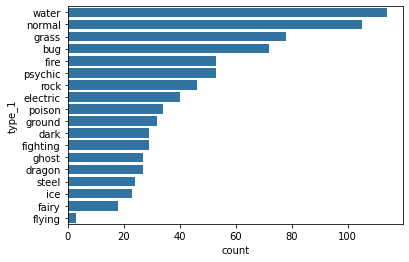

In [7]:
# Plot the Pokemon type on a horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

### Unpivot *type* variable = Reshape the pokemon dataframe
We will use the `pandas.DataFrame.melt()` method to unpivot a DataFrame from wide to long format, optionally leaving identifiers set. The syntax is:
```
DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)
```

In [8]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
print(pkmn_types.shape)
pkmn_types.head()

(1614, 4)


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


### Plot the horizontal bar chart

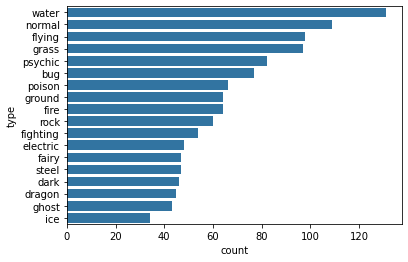

In [9]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()

# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index

# Plot the horizontal bar chart
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

### Plot a bar chart with relative frequency (the proportions)
[Udacity Concept: Absolute vs. Relative Frequency](https://classroom.udacity.com/nanodegrees/nd002/parts/cd0016/modules/52d11870-710a-49bc-bfdb-0844ebaa50d7/lessons/52112010-aca5-4910-88a6-103757d30904/concepts/e6f3d137-5f7f-4bf2-88cb-f6644fffed10)

In [10]:
# Return the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon

# Use numpy.arange() function to produce a set of evenly spaced proportioned  
# values between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)

# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Print parameters
print('max_prop = ', max_prop)
print('tick_props = ', tick_props)
print('tick_names = ', tick_names)

max_prop =  0.10808580858085809
tick_props =  [0.   0.02 0.04 0.06 0.08 0.1 ]
tick_names =  ['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']


The `xticks` and `yticks` functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

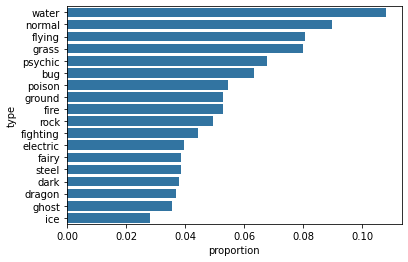

In [11]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

### Print the text (proportion) on the bars of a horizontal plot

Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)

```
matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
```


In [12]:
print(type_counts.head())

water      131
normal     109
flying      98
grass       97
psychic     82
Name: type, dtype: int64


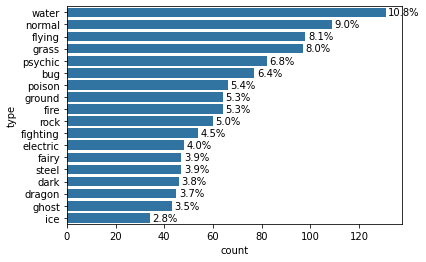

In [13]:
# Plot the baseline bar chart
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Read 'count' form a .value_counts() Series.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

### Print the text (proportion) above the bars of a vertical bar chart

We use the `.get_text()` method to obtain the category name, so we can get the count of each category level. At the end, we use the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

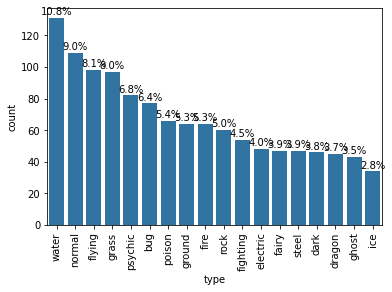

In [14]:
# Plot the baseline bar chart
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);

# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # Get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # Print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [15]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

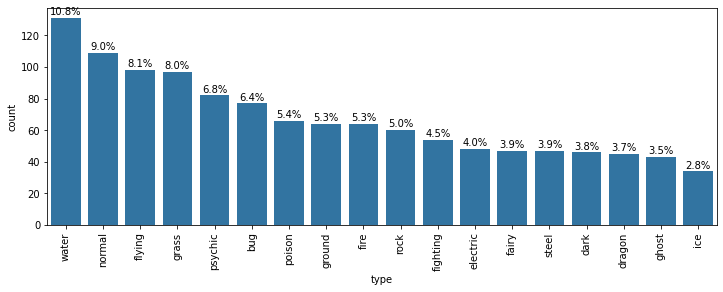

In [16]:
# Plot the baseline bar chart
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # Get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # Print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[Text(0, 0, 'water'), Text(0, 0, 'normal'), Text(0, 0, 'flying'), Text(0, 0, 'grass'), Text(0, 0, 'psychic'), Text(0, 0, 'bug'), Text(0, 0, 'poison'), Text(0, 0, 'ground'), Text(0, 0, 'fire'), Text(0, 0, 'rock'), Text(0, 0, 'fighting'), Text(0, 0, 'electric'), Text(0, 0, 'fairy'), Text(0, 0, 'steel'), Text(0, 0, 'dark'), Text(0, 0, 'dragon'), Text(0, 0, 'ghost'), Text(0, 0, 'ice')]


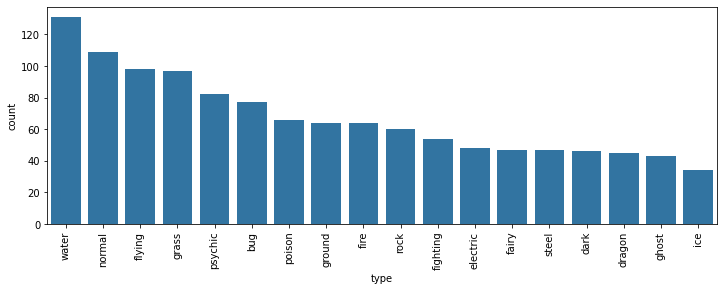

In [17]:
# Plot the baseline bar chart
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);
locs, labels = plt.xticks(rotation=90)
print(locs)
print(list(labels))

### Visualize Missing Values

In [18]:
# Read the data from a CSV file
# Original source of data: https://www.kaggle.com/manjeetsingh/retaildataset available under C0 1.0 Universal (CC0 1.0) Public Domain Dedication License
sales_data = pd.read_csv(path+'sales-data.csv')
print(sales_data.shape)
sales_data.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [19]:
# Initalize `sdm` aka sales data missing Series
sdm = sales_data.isna().sum()
sdm[sdm>0]

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

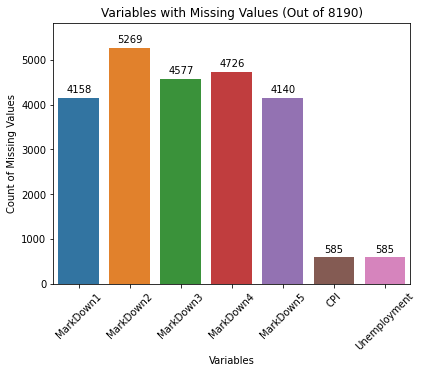

In [20]:
# Specify the default figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 6.4, 4.8

# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
na_counts = sdm[sdm>0].reset_index(name='missing_values_count')

# sns.barplot(na_counts.index.values, na_counts)
# FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`,...
sns.barplot(x='index', y='missing_values_count', data=na_counts)

# get the current tick locations and labels
plt.xticks(rotation=45) 

# Logic to print value on each bar
for i in na_counts.index:
    count = na_counts.at[i,'missing_values_count']

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

bottom, top = plt.ylim()
plt.ylim(bottom, top+300)
plt.xlabel('Variables')
plt.ylabel('Count of Missing Values')
plt.title(f'Variables with Missing Values (Out of {sales_data.shape[0]})')
plt.show()

**Note** - The `seaborn.barplot()` is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the `countplot` function so that you don't need to do extra summarization work. In addition, you'll see what `barplot`'s main purpose is in the adaptations of univariate plots for plotting bivariate data.

## Plot (Top) Relative Frequencies Pattern

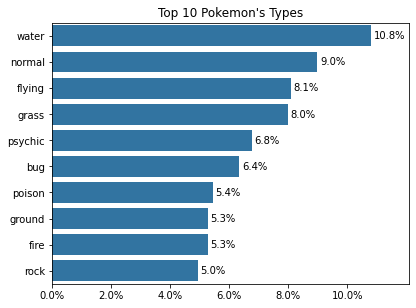

In [141]:
# Initialize parameters
data = pkmn_types['type'].value_counts()
top = 10
title = 'Top {} Pokemon\'s Types'

# Define a function
def plot_top_rel_freq(data, title, top=None, nobs=None):
  """Plot `top` values the `data` series.
  
  Args:
     data - a pd.Series with counts to plot
     title - a chart's title ({} displays a number of categories)
     top - if None, plot all categories
     nobs - if None, use `data.sum()`"""
  
  def set_step(step):
    """Set nicely rounded step size."""
    lg = -1*np.log10(step)
    if lg > 0.1:
      return round(step, round(lg))
    else:
      return round(step, -1)
  
  # Choose the first tuple of RGB colors to reduce distraction
  base_color = sns.color_palette()[0]

  # Check the order of values
  data = data.sort_values(ascending=False)

  # If top == None, plot all observations.
  if top == None or top > data.shape[0]:
    top = data.shape[0]
  
  # If nobs == None, use data.sum()
  if nobs == None:
    nobs = data.sum()
  
  # Compute the lenght of the longest bar in terms of proportion
  max_prop = data[0] / nobs
  # Produce a set of evenly spaced proportioned values
  tick_props = np.arange(0, max_prop, set_step(max_prop/5))
  # Create tick labels
  tick_names = [f'{v:.1%}' for v in tick_props]

  fig, ax = plt.subplots(figsize=(6.4, 4.8))
  ax = sns.barplot(x=data[:top].values, y=data[:top].index, color=base_color)
  # Change tick locations and labels
  plt.xticks(tick_props * nobs, tick_names)

  # Print the proportion text on the bars
  for i in range(top):
      # Read count
      count = data[i]
      # Convert count into a percentage, and then into string
      pct_count = f'{count/nobs:.1%}'
      # Print the string value on the bar
      plt.text(count+round(data[0]/100), i, pct_count, va='center')

  # Render the chart
  left, right = plt.xlim()
  plt.xlim(left, right+round(data[0]/15))
  ax.set_title(title.format(top))

  return None

plot_top_rel_freq(data, title, 10)

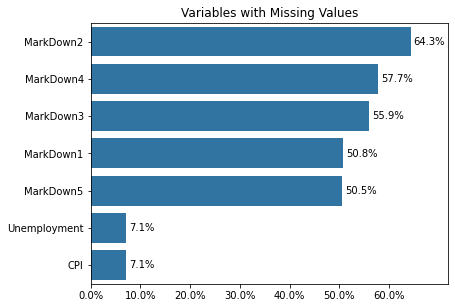

In [142]:
data = sdm[sdm>0]
plot_top_rel_freq(data, 'Variables with Missing Values', None, sales_data.shape[0])